<a href="https://colab.research.google.com/github/phucdzu/AI/blob/main/Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn import datasets as dtset
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LR


import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sas                                

In [4]:
data = pd.read_csv('crabs.csv')
data.head()

,speies,sex,index,fontallip,rearwidth,length,width,depth
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2


In [5]:
#clean data
data = data.drop(data.columns[[0,2]], axis = 1)
data = data.replace("M",1)
data = data.replace("F",0)
data.head()

,sex,fontallip,rearwidth,length,width,depth
0,1,8.1,6.7,16.1,19.0,7.0
1,1,8.8,7.7,18.1,20.8,7.4
2,1,9.2,7.8,19.0,22.4,7.7
3,1,9.6,7.9,20.1,23.1,8.2
4,1,9.8,8.0,20.3,23.0,8.2


<Axes: >

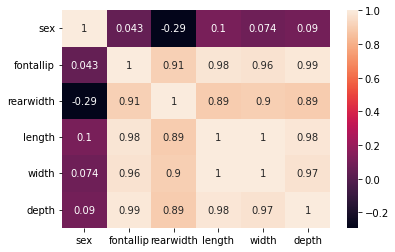

In [6]:
#Biểu đồ nhiệt thể hiện thay thế cho ma trận correlation
corr = data.corr()
sas.heatmap(corr,annot = True)

In [7]:
X = data.drop(data.columns[[0]], axis = 1)
y = data['sex']
print(X[:5])
print(y[:5])

   fontallip  rearwidth  length  width  depth
0        8.1        6.7    16.1   19.0    7.0
1        8.8        7.7    18.1   20.8    7.4
2        9.2        7.8    19.0   22.4    7.7
3        9.6        7.9    20.1   23.1    8.2
4        9.8        8.0    20.3   23.0    8.2
0    1
1    1
2    1
3    1
4    1
Name: sex, dtype: int64


In [8]:
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
print(X_train[:5])
print(y_train[:5])

     fontallip  rearwidth  length  width  depth
89        15.5       13.8    33.4   38.7   14.7
141       20.6       14.4    42.8   46.5   19.6
37        17.1       12.6    36.4   42.0   15.1
60        11.0        9.8    22.5   25.7    8.2
186       19.9       16.6    39.4   43.9   17.9
89     0
141    1
37     1
60     0
186    0
Name: sex, dtype: int64


In [10]:
#create a model for it
model = Perceptron(max_iter = 500, eta0 = 0.5, random_state = 0)      #max_iter: la so lan hoc, eta: toc do hoc
#Lay hai bien X va t lamf output
model.fit(X_train_std,y_train)

y_pred = model.predict(X_test_std)

print(y_pred)
print(y_test)
print('Do chinh xac cau mo hinh: ', accuracy_score(y_test, y_pred))

[0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0]
81     0
182    0
84     0
100    1
138    1
145    1
65     0
70     0
117    1
51     0
160    0
55     0
43     1
135    1
66     0
143    1
166    0
97     0
110    1
191    0
122    1
92     0
19     1
190    0
149    1
102    1
68     0
109    1
6      1
63     0
167    0
125    1
40     1
22     1
44     1
181    0
195    0
85     0
53     0
147    1
199    0
128    1
163    0
99     0
130    1
58     0
21     1
75     0
105    1
96     0
41     1
126    1
164    0
14     1
124    1
165    0
189    0
30     1
10     1
170    0
Name: sex, dtype: int64
Do chinh xac cau mo hinh:  0.8833333333333333
